In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("/Users/mugunthansaravanan/Desktop/Project/Datasets/Company Attrition Data.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Sales_Occured,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

In [4]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Sales_Occured             object
salary                    object
dtype: object

In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Sales_Occured            0
salary                   0
dtype: int64

In [6]:
df.isnull().values.any()

False

/Users/mugunthansaravanan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='left', ylabel='count'>

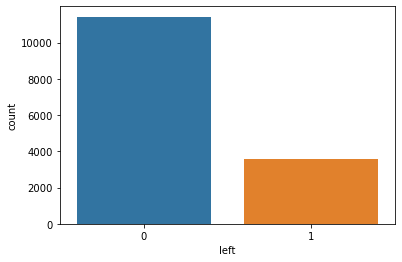

In [7]:
sns.countplot(df['left'])

In [8]:
X=df.drop(columns=['promotion_last_5years', 'Sales_Occured', 'salary','left'],axis=1)
y=df["left"]
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident
2205,0.70,0.69,3,102,4,1
11396,0.63,0.48,4,180,4,0
7877,0.43,0.46,2,239,3,1
2634,0.44,0.42,4,159,4,0
8807,0.49,0.68,3,181,3,0


In [10]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [11]:
forest.score(X_train, y_train)

0.998583215267939

In [12]:
pred=forest.predict(X_test)
pred[:10]

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0])

In [13]:
y_test[:10]

10669    0
12621    1
13074    0
2764     0
279      1
10185    0
2319     0
1959     1
702      1
11469    0
Name: left, dtype: int64

In [14]:
# Simple Prediction
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)*100

99.13333333333333